In [2]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix

In [3]:
import json
from pprint import pprint

tmp_list = []
# with open('/Users/danielkershaw/PycharmProjects/DiffusionSimulation/output/lr-test/part-00000') as data_file:
with open('/Users/danielkershaw/Downloads/lr-reddit-comment-time') as data_file:
    for l in data_file:
        data = json.loads(l)
        tmp_list.append(data)
df = pd.DataFrame(tmp_list)


In [4]:
df.head()

,combination,observation_level,results_test,results_train,target
0,all,1,110.169590,212.478524,user_target
1,all,1,1696.392666,4379.468625,activation_target
2,basic,1,117.084389,225.001415,user_target
3,basic,1,1662.837149,4591.770019,activation_target
4,exposure,1,225.332890,289.987895,user_target


In [5]:
dft = df.drop('results_train', 1).set_index(['target','combination','observation_level'])
# dft.sortlevel(level=1).plot(legend=False)

In [6]:
dft.unstack().T

target                         activation_target                              \
combination                                  all         basic     community   
             observation_level                                                 
results_test 0                      16673.328135  16730.656623  16663.543188   
             1                       1696.392666   1662.837149   1702.330521   
             2                      15941.321363  16289.952219  16015.037916   
             3                      15806.046910  16117.847416  15816.126836   
             4                      15945.645299  17041.781785  16001.386250   
             5                        612.130257    343.722942    628.082539   
             6                        657.480557    378.361593    675.186614   
             7                        537.523073    276.904627    577.431528   
             8                        846.775913    360.172285    895.170681   
             9                        643.695023    306.837970    716.108161   
             10                     13806.583776  15457.511322  13732.233029   
             11                       628.893981    235.264751    680.171031   
             12                       640.538050    340.071726    678.052300   
             13                     14110.492145  15651.412945  13801.059508   
             14                     13843.925255  15420.392013  13785.613992   
             15                       687.437239    561.948163    827.814133   
             16                       677.492497    563.839940    808.397515   
             17                       607.973817    373.369032    661.450999   
             18                     14027.745123  15454.257798  13893.005332   
             19                       474.270626     92.285714    566.984590   
             20                       480.343713    120.264112    577.302580   
             21                     13858.167041  15185.813459  13787.440179   
             22                       997.536283   1259.811301   1079.070686   
             23                     13876.658951  15157.070649  13808.919576   
             24                       408.748716    156.050069    502.396280   
             25                       526.702525    448.974243    649.453088   
             26                       371.990474     74.239437    427.501085   
             27                     14191.406129  15330.312401  14084.504565   
             28                       376.194699    225.604298    469.524418   
             29                       447.909391    169.690242    578.572766   
             30                     14035.745448  15112.632821  13908.292601   

target                                                       user_target  \
combination                         exposure          time           all   
             observation_level                                             
results_test 0                  16785.674574  16786.714418  3.416859e+02   
             1                   1850.863392   1832.600535  1.101696e+02   
             2                  16629.788834  16599.123763  2.422201e+02   
             3                  16280.408178  16265.301565  8.324124e+01   
             4                  17467.956058  17451.431774  1.075733e+02   
             5                    500.836955    512.655162  6.997691e+01   
             6                    873.414086    889.367181  1.007330e+02   
             7                    411.890581    414.558568  6.673062e+01   
             8                    585.079501    608.668130  7.645497e+01   
             9                    663.753078    691.839172  6.558559e+01   
             10                 16217.815602  16240.973704  3.133369e+01   
             11                   645.804251    652.295429  4.448984e+01   
             12                  1585.536707    601.702029  2.622708e+01   
             13                 10589.010095  16886.482613  3.7

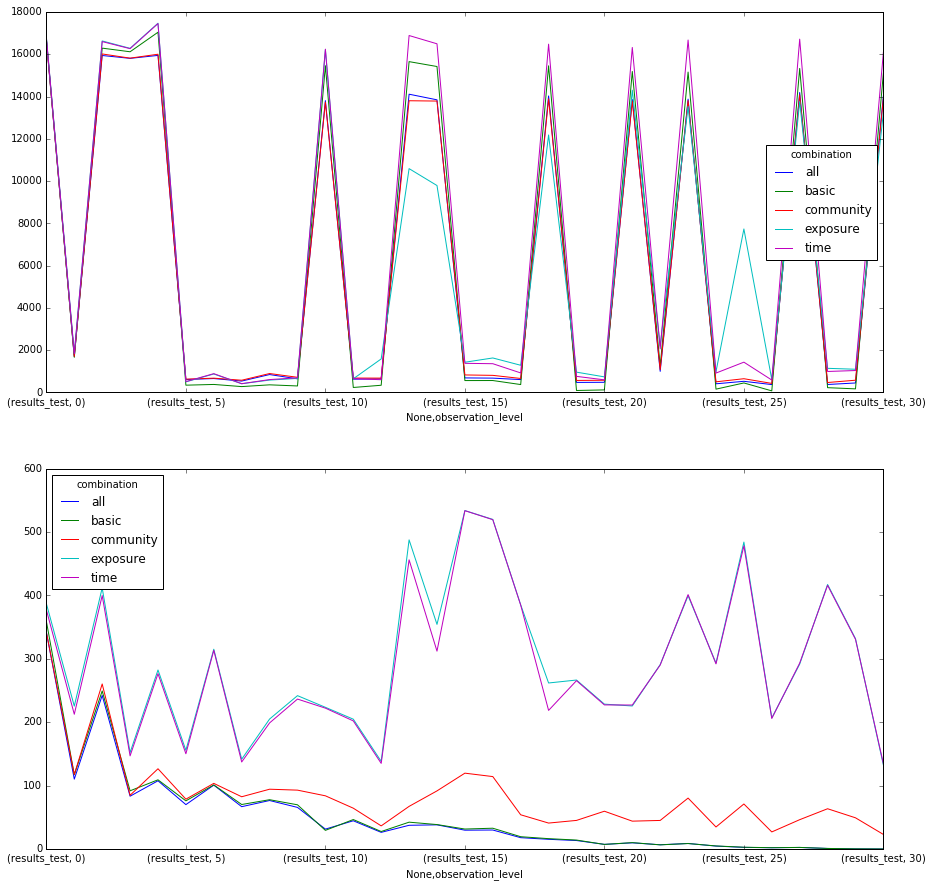

In [7]:
f, a = plt.subplots(2,1,figsize=(15,15))
dft.unstack().T.xs('activation_target', axis=1).plot(ax=a[0])
dft.unstack().T.xs('user_target', axis=1).plot(ax=a[1])


In [8]:
dft.unstack().T.xs('activation_target', axis=1)

combination                              all         basic     community  \
             observation_level                                             
results_test 0                  16673.328135  16730.656623  16663.543188   
             1                   1696.392666   1662.837149   1702.330521   
             2                  15941.321363  16289.952219  16015.037916   
             3                  15806.046910  16117.847416  15816.126836   
             4                  15945.645299  17041.781785  16001.386250   
             5                    612.130257    343.722942    628.082539   
             6                    657.480557    378.361593    675.186614   
             7                    537.523073    276.904627    577.431528   
             8                    846.775913    360.172285    895.170681   
             9                    643.695023    306.837970    716.108161   
             10                 13806.583776  15457.511322  13732.233029   
             11                   628.893981    235.264751    680.171031   
             12                   640.538050    340.071726    678.052300   
             13                 14110.492145  15651.412945  13801.059508   
             14                 13843.925255  15420.392013  13785.613992   
             15                   687.437239    561.948163    827.814133   
             16                   677.492497    563.839940    808.397515   
             17                   607.973817    373.369032    661.450999   
             18                 14027.745123  15454.257798  13893.005332   
             19                   474.270626     92.285714    566.984590   
             20                   480.343713    120.264112    577.302580   
             21                 13858.167041  15185.813459  13787.440179   
             22                   997.536283   1259.811301   1079.070686   
             23                 13876.658951  15157.070649  13808.919576   
             24                   408.748716    156.050069    502.396280   
             25                   526.702525    448.974243    649.453088   
             26                   371.990474     74.239437    427.501085   
             27                 14191.406129  15330.312401  14084.504565   
             28                   376.194699    225.604298    469.524418   
             29                   447.909391    169.690242    578.572766   
             30                 14035.745448  15112.632821  13908.292601   

combination                         exposure          time  
             observation_level                              
results_test 0                  16785.674574  16786.714418  
             1                   1850.863392   1832.600535  
             2                  16629.788834  16599.123763  
             3                  16280.408178  16265.301565  
             4                  17467.956058  17451.431774  
             5                    500.836955    512.655162  
             6                    873.414086    889.367181  
             7                    411.890581    414.558568  
             8                    585.079501    608.668130  
             9                    663.753078    691.839172  
             10                 16217.815602  16240.973704  
             11                   645.804251    652.295429  
             12                  1585.536707    601.702029  
             13                 10589.010095  16886.482613  
             14                  9789.436066  16494.849576  
             15                  1428.895235   1377.528988  
             16                  1631.156953   1359.688556  
             17                  1285.830913    923.036640  
             18                 12181.658845  16478.210665  
             19                   960.529627    760.685192  
             20                   736.263314    596.230873  
             21                 14302.039556  16321.993205  
             22            